In [1]:
import pandas as pd
%run 'Setup.py'
X_train = x_train
X_test = x_test

8 different classes: Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock.
objective 1: construct a classifier which, based on the features of a song, predicts its genre
objective 2: estimate its generalisation error under the 0–1 loss.
Features are real-valued, correspond to summary statistics (mean, sd, skewness, kurtosis, median, min, max) of 
time series of various music features, such as the chromagram or the Mel-frequency cepstrum.
Feature description: 

Feature description: 
chroma_cens: Chroma Energy Normalized (CENS, 12 chroma) - 84 features
chroma_cqt: Constant-Q chromagram (12 chroma) - 84 features
chroma_stft: Chromagram (12 chroma) - 84 features
mfcc: Mel-frequency cepstrum (20 coefficients) - 140 features
rmse: Root-mean-square - 7 features
spectral_bandwidth: Spectral bandwidth - 7 features
spectral_centroid: Spectral centroid - 7 features
spectral_contrast: Spectral contrast (7 frequency bands) - 49 features
spectral_rolloff: Roll-off freque

## Practical Assignments STEPS

### 1. EDA: Distribution of genres, Range and type of feature values, Patterns or Anomalies.

### 2. Feature Engineering: 

### 3. Preprocessing: NA data

### 4. Model Selection:

### 5. Model Training and Tuning:

### 6. Evaluation:

### 7. Report Writing:

### 8. Review:


## Explanatory Data Analysis

<Axes: xlabel='Genre'>

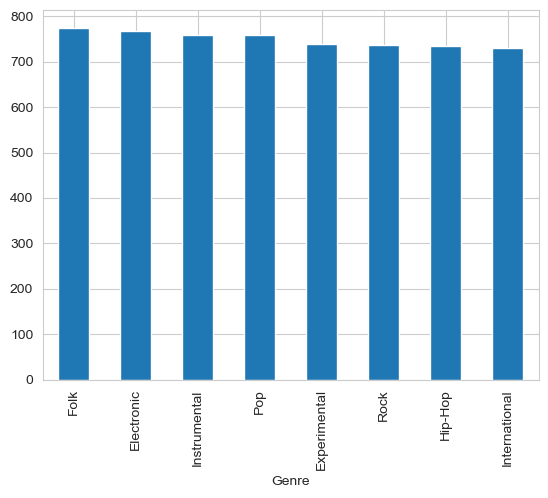

In [2]:
y_train["Genre"].value_counts().plot(kind='bar')

In [3]:
X_train

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
Id,,,,,,,,,,,,,,,,,,,,,
0,-0.266585,-0.984668,-0.729823,-0.895122,2.138628,0.935209,0.104089,-0.698659,-0.736408,-0.334376,...,0.065003,0.016522,0.015776,5.743597,0.307617,0.051370,0.042480,0.002441,1.976972,0.034533
1,-0.180061,0.260884,-0.069373,0.208734,-0.078855,-0.577818,0.583788,0.143781,0.291556,0.007314,...,0.087692,0.016355,0.016605,64.870987,0.812988,0.082784,0.069824,0.003906,7.374503,0.074870
2,-0.692900,0.356662,0.062617,0.248280,3.470037,0.166613,0.823874,0.181112,0.551939,0.357985,...,0.132387,0.025847,0.023922,34.251705,0.850098,0.058200,0.036621,0.010254,5.927942,0.117603
3,0.243339,0.214182,-0.049026,1.456255,-0.360826,-0.875256,-0.770200,0.315500,0.789956,0.448319,...,0.071478,0.019166,0.025535,1.364990,0.342285,0.081713,0.075195,0.000000,1.100437,0.041754
4,-0.968576,0.309255,0.223164,0.160960,0.919838,-0.111985,-1.012521,-0.665692,-0.316646,-0.264381,...,0.106220,0.023536,0.019742,3.589230,0.322266,0.073736,0.069336,0.004395,1.210593,0.036459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.503490,-0.540720,-0.690117,-0.107338,-0.647856,-0.681969,-0.246245,-0.546552,0.062783,0.070393,...,0.084929,0.017250,0.020335,4.868783,0.668945,0.076452,0.044434,0.001465,2.045856,0.084214
5996,-0.600597,0.406386,-0.748409,-0.316157,-0.507428,-0.054214,-0.476804,-0.373120,-0.930158,-1.080690,...,0.075407,0.014998,0.020683,7.893681,0.584961,0.076210,0.048340,0.000000,2.561808,0.073010
5997,-1.014298,-0.950744,0.618304,0.204298,-0.788411,-0.794254,-0.586847,0.099172,-0.313476,-0.523417,...,0.138591,0.024969,0.023658,27.257378,0.373047,0.042598,0.037598,0.000000,3.778109,0.027813


In [3]:
# Feature Types are all float64
X_train.dtypes

chroma_cens_kurtosis_01    float64
chroma_cens_kurtosis_02    float64
chroma_cens_kurtosis_03    float64
chroma_cens_kurtosis_04    float64
chroma_cens_kurtosis_05    float64
                            ...   
zcr_mean_01                float64
zcr_median_01              float64
zcr_min_01                 float64
zcr_skew_01                float64
zcr_std_01                 float64
Length: 518, dtype: object

In [5]:
df_merged = pd.merge(y_train, X_train, on='Id', how='inner')

In [6]:
# Summary Statistics on the whole data set
df_summary = np.transpose(df_merged.describe())
df_summary

,count,mean,std,min,25%,50%,75%,max
chroma_cens_kurtosis_01,6000.0,0.107609,1.622556,-1.750532,-0.687784,-0.221944,0.422105,42.851593
chroma_cens_kurtosis_02,6000.0,0.012346,1.911876,-1.816620,-0.732581,-0.288179,0.336494,79.781960
chroma_cens_kurtosis_03,6000.0,0.127187,1.897625,-1.825738,-0.688573,-0.219804,0.427675,75.713921
chroma_cens_kurtosis_04,6000.0,-0.002926,1.241022,-1.760243,-0.700126,-0.262057,0.325397,23.989765
chroma_cens_kurtosis_05,6000.0,0.061176,1.659644,-1.781202,-0.728725,-0.271311,0.375869,43.405674
...,...,...,...,...,...,...,...,...
zcr_mean_01,6000.0,0.050551,0.028198,0.003490,0.032310,0.046176,0.062466,0.629665
zcr_median_01,6000.0,0.041315,0.027149,0.000000,0.024414,0.036621,0.051758,0.749512
zcr_min_01,6000.0,0.002485,0.004728,0.000000,0.000000,0.000977,0.003418,0.170898
zcr_skew_01,6000.0,3.551028,3.019898,-3.143864,1.648752,2.734890,4.623893,36.000904


In [7]:
df_summary_genre = np.transpose(df_merged.groupby("Genre").describe())

In [8]:
df_summary_genre

Genre                          Electronic  Experimental        Folk  \
chroma_cens_kurtosis_01 count  767.000000    739.000000  775.000000   
                        mean     0.113109      0.260383    0.134440   
                        std      1.197379      1.663332    2.588868   
                        min     -1.660720     -1.616775   -1.631975   
                        25%     -0.676622     -0.598612   -0.786163   
...                                   ...           ...         ...   
zcr_std_01              min      0.005384      0.002608    0.004796   
                        25%      0.032783      0.020847    0.018293   
                        50%      0.046783      0.032354    0.026234   
                        75%      0.064067      0.052439    0.038463   
                        max      0.181253      0.285275    0.161899   

Genre                             Hip-Hop  Instrumental  International  \
chroma_cens_kurtosis_01 count  734.000000    759.000000     731.000000   
                        mean     0.088674      0.035599      -0.020695   
                        std      1.224810      2.145448       0.962064   
                        min     -1.712478     -1.750532      -1.718295   
                        25%     -0.604703     -0.907628      -0.599006   
...                                   ...           ...            ...   
zcr_std_01              min      0.004279      0.004927       0.006463   
                        25%      0.036697      0.014154       0.024375   
                        50%      0.050841      0.022367       0.032726   
                        75%      0.067683      0.037239       0.045842   
                        max      0.192075      0.230484       0.131864   

Genre                                 Pop        Rock  
chroma_cens_kurtosis_01 count  758.000000  737.000000  
                        mean    -0.038665    0.291198  
                        std      0.983710    1.376216  
                        min     -1.563389   -1.592557  
                        25%     -0.698441   -0.505099  
...                                   ...         ...  
zcr_std_01              min      0.006301    0.006674  
                        25%      0.026258    0.021994  
                        50%      0.035473    0.029324  
                        75%      0.049541    0.040303  
                        max      0.168907    0.137388  

[4144 rows x 8 columns]

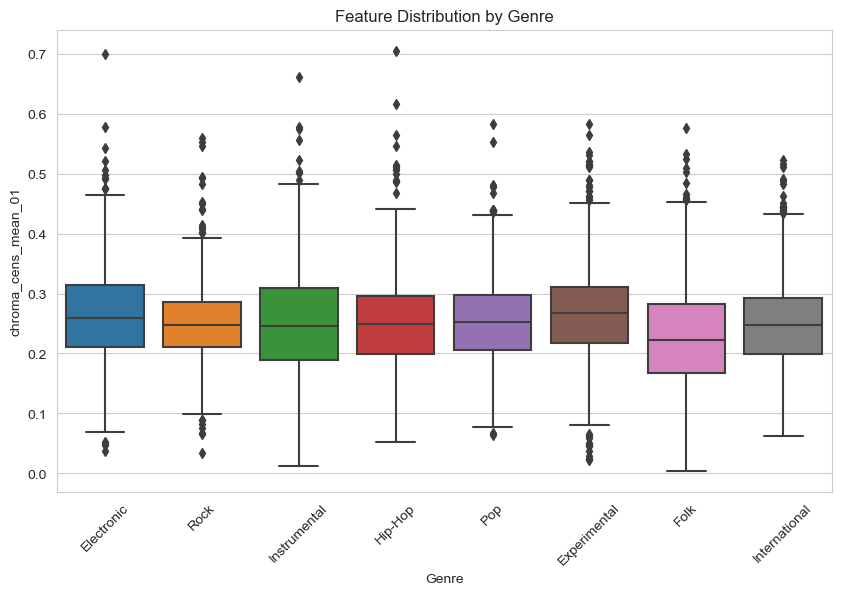

In [9]:
# Box plot for a specific feature across genres
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='chroma_cens_mean_01', data=df_merged)
plt.title('Feature Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

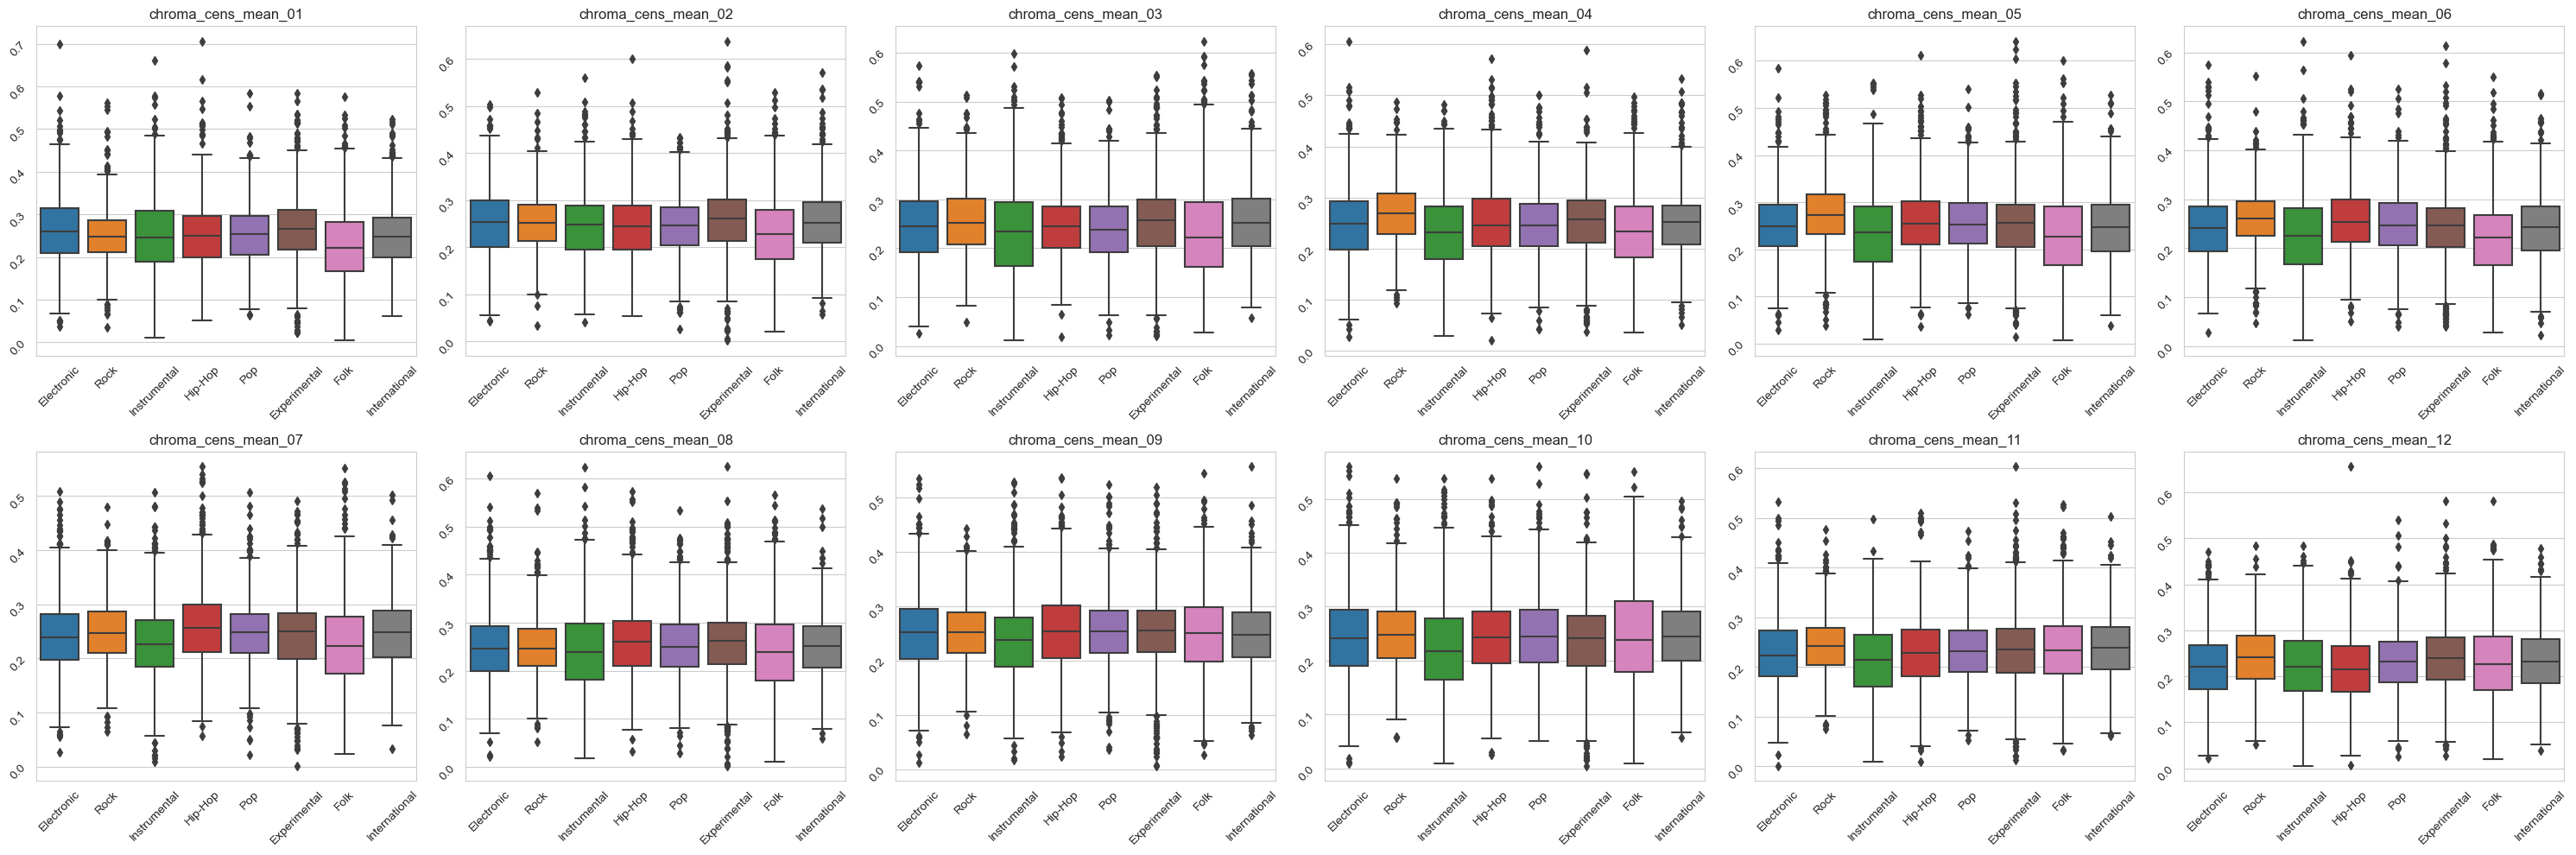

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure, specifying the overall grid size: 2 rows, 6 columns
fig, axes = plt.subplots(2, 6, figsize=(30, 10))

names = ["chroma_cens_mean_01", "chroma_cens_mean_02", "chroma_cens_mean_03", "chroma_cens_mean_04", "chroma_cens_mean_05", "chroma_cens_mean_06", 
         "chroma_cens_mean_07", "chroma_cens_mean_08", "chroma_cens_mean_09", "chroma_cens_mean_10", "chroma_cens_mean_11", "chroma_cens_mean_12"]

for i in range(12):
    row, col = divmod(i, 6)
    sns.boxplot(x = "Genre", y = names[i], data = df_merged, ax = axes[row, col])
    axes[row, col].set_title(names[i])
    axes[row, col].set_xlabel('')  # Optional: remove x-axis label for clarity
    axes[row, col].set_ylabel('')  # Optional: remove y-axis label for clarity
    axes[row, col].tick_params(labelrotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()



In [59]:
for key in dfs_by_stat:
    print(key)

std
min
skew
max
median
mean
kurtosis


In [71]:
correlation_matrix

,chroma_cens_mean_01,chroma_cens_mean_02,chroma_cens_mean_03,chroma_cens_mean_04,chroma_cens_mean_05,chroma_cens_mean_06,chroma_cens_mean_07,chroma_cens_mean_08,chroma_cens_mean_09,chroma_cens_mean_10,...,spectral_contrast_mean_06,spectral_contrast_mean_07,spectral_rolloff_mean_01,tonnetz_mean_01,tonnetz_mean_02,tonnetz_mean_03,tonnetz_mean_04,tonnetz_mean_05,tonnetz_mean_06,zcr_mean_01
chroma_cens_mean_01,1.000000,0.524491,-0.179380,-0.275169,-0.055660,-0.057412,-0.121488,-0.056904,-0.216605,-0.335666,...,0.007913,0.013902,0.078935,0.008012,0.272308,0.049164,0.506240,0.192469,0.235149,0.077255
chroma_cens_mean_02,0.524491,1.000000,0.587711,0.028634,-0.278550,-0.201811,-0.140124,-0.154551,-0.200852,-0.168791,...,0.004034,0.038635,0.074296,-0.038312,0.108438,-0.344518,-0.069410,0.087409,0.119256,0.074935
chroma_cens_mean_03,-0.179380,0.587711,1.000000,0.581135,-0.170302,-0.254930,-0.105403,-0.131492,-0.175313,-0.042982,...,0.008771,0.059162,0.059239,0.059032,0.074678,-0.085893,-0.573092,-0.230600,-0.006275,0.070314
chroma_cens_mean_04,-0.275169,0.028634,0.581135,1.000000,0.534222,0.056799,-0.252057,-0.247998,-0.234791,-0.128591,...,-0.016309,0.087594,0.081771,-0.108255,0.024905,0.229539,-0.107277,-0.027517,0.041024,0.088519
chroma_cens_mean_05,-0.055660,-0.278550,-0.170302,0.534222,1.000000,0.667259,-0.106443,-0.326182,-0.243534,-0.130517,...,-0.032913,0.099163,0.102425,0.039577,0.012665,-0.044916,0.459944,0.157756,-0.104445,0.101334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tonnetz_mean_03,0.049164,-0.344518,-0.085893,0.229539,-0.044916,-0.346042,0.115490,0.504966,0.007452,-0.477371,...,0.034209,-0.031747,-0.046203,0.044505,-0.073996,1.000000,0.036684,0.085498,-0.206955,-0.011274
tonnetz_mean_04,0.506240,-0.069410,-0.573092,-0.107277,0.459944,0.130286,-0.339475,-0.028630,0.201907,-0.120127,...,0.006884,-0.008710,0.004404,-0.002838,0.099190,0.036684,1.000000,0.271980,0.045893,-0.016022
tonnetz_mean_05,0.192469,0.087409,-0.230600,-0.027517,0.157756,-0.113111,-0.036352,0.178304,-0.004724,-0.064856,...,-0.019175,0.015644,0.013756,-0.062666,0.141142,0.085498,0.271980,1.000000,0.105917,-0.020430
tonnetz_mean_06,0.235149,0.119256,-0.006275,0.041024,-0.104445,-0.075149,0.053456,-0.140592,-0.057572,0.172040,...,-0.018534,0.018957,0.049401,-0.061662,0.187471,-0.206955,0.045893,0.105917,1.000000,-0.009000


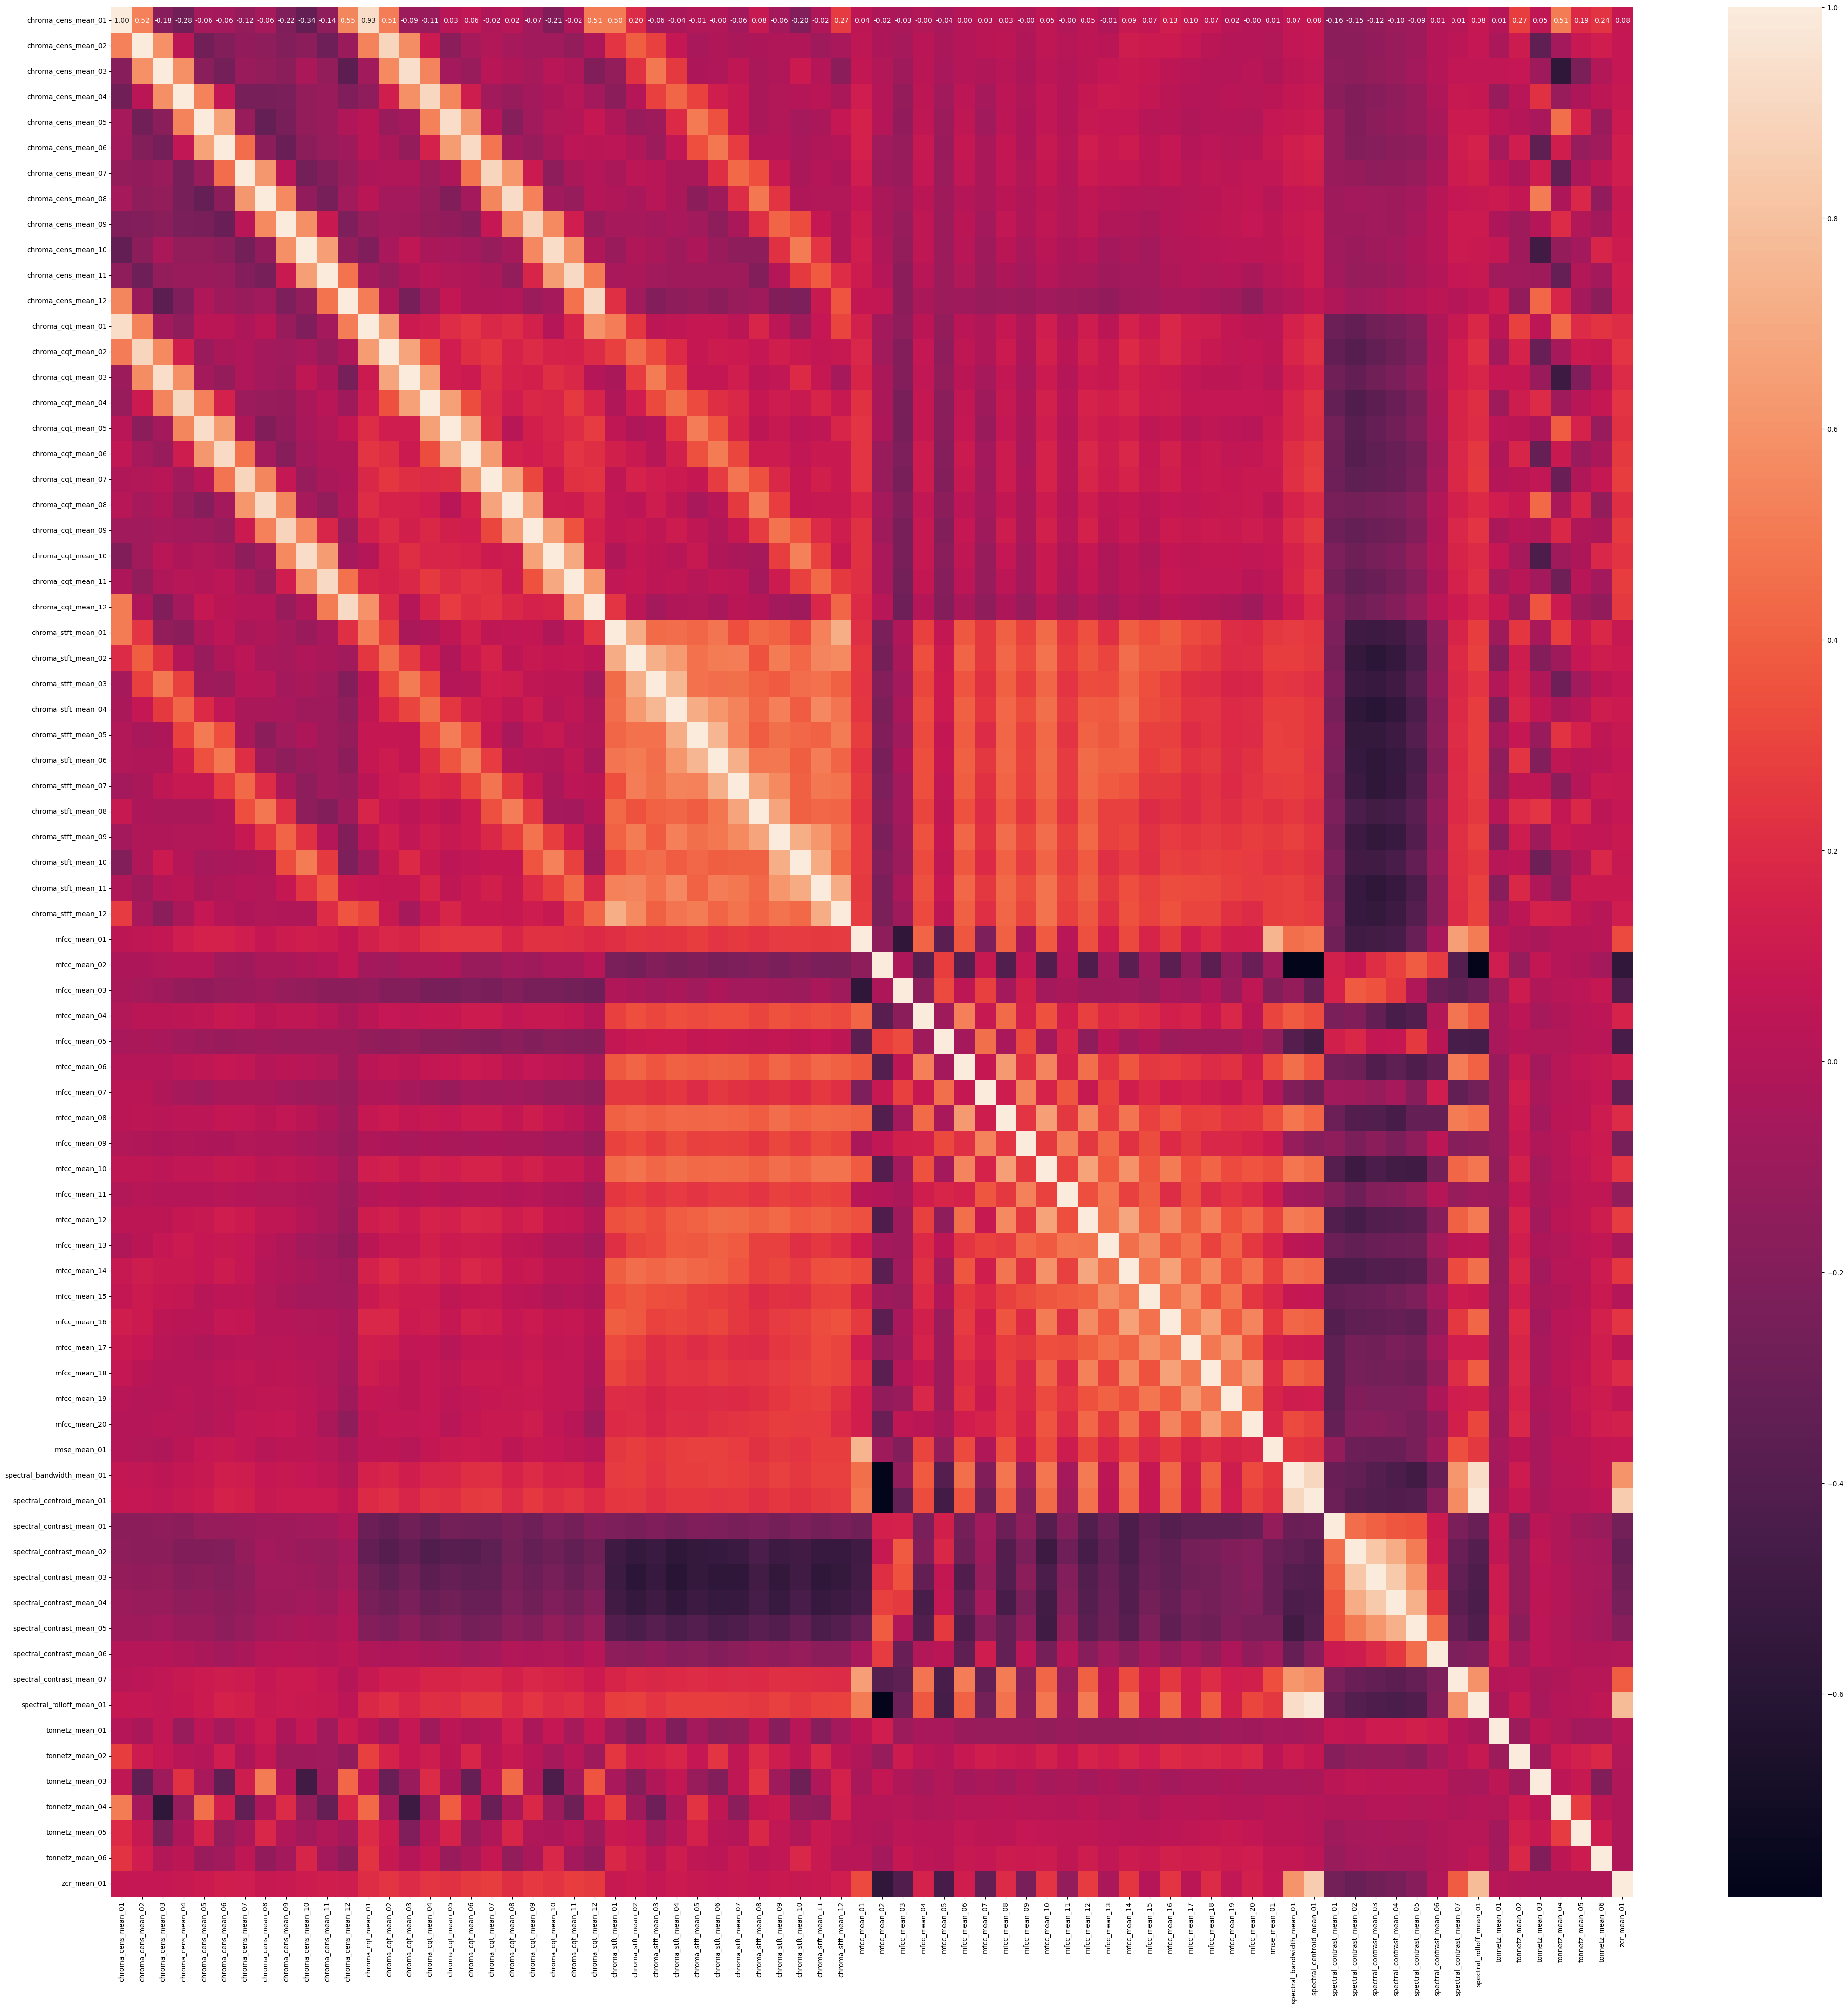

In [75]:
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [4]:
df = X_train
# Let's find out unique statistics used in the column names
stats_keywords = set()
for col in df.columns:
    # Split the column name by underscore and take the second last element
    stat_keyword = col.rsplit('_', 2)[-2]
    stats_keywords.add(stat_keyword)

# Now we create a dictionary of dataframes for each statistical measurement
dfs_by_stat = {stat: df.filter(like=f'_{stat}_') for stat in stats_keywords}

df_mean = dfs_by_stat['mean']
df_std = dfs_by_stat['std']
df_min = dfs_by_stat['min']
df_median = dfs_by_stat['median']
df_max = dfs_by_stat['max']
df_skew = dfs_by_stat['skew']
df_kurtosis = dfs_by_stat['kurtosis']

correlation_mean = df_mean.corr()
correlation_std = df_std.corr()
correlation_min = df_min.corr()
correlation_median = df_median.corr()
correlation_max = df_max.corr()
correlation_skew = df_skew.corr()
correlation_kurtosis = df_kurtosis.corr()

upper_tri_mean = np.triu_indices_from(correlation_mean, k=1)
upper_tri_std = np.triu_indices_from(correlation_std, k=1)
upper_tri_min = np.triu_indices_from(correlation_min, k=1)
upper_tri_median = np.triu_indices_from(correlation_median, k=1)
upper_tri_max = np.triu_indices_from(correlation_max, k=1)
upper_tri_skew = np.triu_indices_from(correlation_skew, k=1)
upper_tri_kurtosis = np.triu_indices_from(correlation_kurtosis, k=1)


In [5]:
from collections import Counter
import pprint
# Define a high correlation threshold
high_corr_threshold = 0.8

In [6]:
# Mean Feature reduction

# Find pairs of highly correlated features
high_corr_mean = [(correlation_mean.columns[i], correlation_mean.columns[j])
                           for i, j in zip(*upper_tri_mean)
                           if abs(correlation_mean.iloc[i, j]) > high_corr_threshold]

all_mean_features = [feature for pair in high_corr_mean for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_mean_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_mean)
print("")
print("Central Features")
pprint.pprint(central_features)

"""
As we can see in the output for example, with "spectral_rolloff_mean_01" 
we can explain the other two central features "spectral_bandwidth_mean_01" and "spectral_centroid_mean_01"
"""

mean_removals = ([pair[1] for pair in high_corr_mean[0:6]] + 
                 [pair[0] for pair in high_corr_mean[6:12]] + 
                 [high_corr_mean[12][0], high_corr_mean[14][1], high_corr_mean[15][1], 
                  high_corr_mean[16][0], high_corr_mean[17][1]])
print("")
print("Features to remove")
pprint.pprint(mean_removals)

Highly correlated features
[('chroma_cens_mean_01', 'chroma_cqt_mean_01'),
 ('chroma_cens_mean_02', 'chroma_cqt_mean_02'),
 ('chroma_cens_mean_03', 'chroma_cqt_mean_03'),
 ('chroma_cens_mean_04', 'chroma_cqt_mean_04'),
 ('chroma_cens_mean_05', 'chroma_cqt_mean_05'),
 ('chroma_cens_mean_06', 'chroma_cqt_mean_06'),
 ('chroma_cens_mean_07', 'chroma_cqt_mean_07'),
 ('chroma_cens_mean_08', 'chroma_cqt_mean_08'),
 ('chroma_cens_mean_09', 'chroma_cqt_mean_09'),
 ('chroma_cens_mean_10', 'chroma_cqt_mean_10'),
 ('chroma_cens_mean_11', 'chroma_cqt_mean_11'),
 ('chroma_cens_mean_12', 'chroma_cqt_mean_12'),
 ('spectral_bandwidth_mean_01', 'spectral_centroid_mean_01'),
 ('spectral_bandwidth_mean_01', 'spectral_rolloff_mean_01'),
 ('spectral_centroid_mean_01', 'spectral_rolloff_mean_01'),
 ('spectral_centroid_mean_01', 'zcr_mean_01'),
 ('spectral_contrast_mean_02', 'spectral_contrast_mean_03'),
 ('spectral_contrast_mean_03', 'spectral_contrast_mean_04')]

Central Features
['spectral_bandwidth_mean_0

In [7]:
# Standard deviation Feature reduction

# Find pairs of highly correlated features
high_corr_std = [(correlation_std.columns[i], correlation_std.columns[j])
                           for i, j in zip(*upper_tri_std)
                           if abs(correlation_std.iloc[i, j]) > high_corr_threshold]

all_std_features = [feature for pair in high_corr_std for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_std_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_std)
print("")
print("Central Features")
pprint.pprint(central_features)

std_removals = ['chroma_cens_std_03', 'chroma_cqt_std_08', 'chroma_cens_std_10',
                'mfcc_std_12', 'mfcc_std_14', 'mfcc_std_15', 'mfcc_std_17',
                'mfcc_std_18', 'mfcc_std_19', 'spectral_bandwidth_std_01',
                'spectral_centroid_std_01']
print("")
print("Features to remove")
pprint.pprint(std_removals)

Highly correlated features
[('chroma_cens_std_03', 'chroma_cqt_std_03'),
 ('chroma_cens_std_08', 'chroma_cqt_std_08'),
 ('chroma_cens_std_10', 'chroma_cqt_std_10'),
 ('mfcc_std_12', 'mfcc_std_13'),
 ('mfcc_std_13', 'mfcc_std_14'),
 ('mfcc_std_14', 'mfcc_std_15'),
 ('mfcc_std_15', 'mfcc_std_16'),
 ('mfcc_std_15', 'mfcc_std_17'),
 ('mfcc_std_16', 'mfcc_std_17'),
 ('mfcc_std_16', 'mfcc_std_18'),
 ('mfcc_std_17', 'mfcc_std_18'),
 ('mfcc_std_17', 'mfcc_std_19'),
 ('mfcc_std_18', 'mfcc_std_19'),
 ('mfcc_std_19', 'mfcc_std_20'),
 ('spectral_bandwidth_std_01', 'spectral_rolloff_std_01'),
 ('spectral_centroid_std_01', 'spectral_rolloff_std_01'),
 ('spectral_centroid_std_01', 'zcr_std_01')]

Central Features
['mfcc_std_13',
 'mfcc_std_14',
 'mfcc_std_15',
 'mfcc_std_16',
 'mfcc_std_17',
 'mfcc_std_18',
 'mfcc_std_19',
 'spectral_rolloff_std_01',
 'spectral_centroid_std_01']

Features to remove
['chroma_cens_std_03',
 'chroma_cqt_std_08',
 'chroma_cens_std_10',
 'mfcc_std_12',
 'mfcc_std_14',
 'm

In [9]:
# Standard deviation Feature reduction

# Find pairs of highly correlated features
high_corr_min = [(correlation_min.columns[i], correlation_min.columns[j])
                           for i, j in zip(*upper_tri_min)
                           if abs(correlation_min.iloc[i, j]) > high_corr_threshold]

all_min_features = [feature for pair in high_corr_min for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_min_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_min)
print("")
print("Central Features")
pprint.pprint(central_features)

min_removals = ['chroma_cqt_min_01', 'chroma_cqt_min_03', 'chroma_cqt_min_04', 'chroma_cqt_min_06',
                'chroma_cqt_min_08', 'chroma_cqt_min_10', 'chroma_cqt_min_12',
                'chroma_stft_min_02', 'chroma_stft_min_03', 'chroma_stft_min_04', 'chroma_stft_min_06',
                'chroma_stft_min_07', 'chroma_stft_min_08', 'chroma_stft_min_09', 'chroma_stft_min_10',
                'chroma_stft_min_11', 'chroma_stft_min_12', 'spectral_bandwidth_min_01', 'spectral_rolloff_min_01']

print("")
print("Features to remove")
pprint.pprint(min_removals)

Highly correlated features
[('chroma_cqt_min_01', 'chroma_cqt_min_02'),
 ('chroma_cqt_min_02', 'chroma_cqt_min_03'),
 ('chroma_cqt_min_04', 'chroma_cqt_min_05'),
 ('chroma_cqt_min_05', 'chroma_cqt_min_06'),
 ('chroma_cqt_min_06', 'chroma_cqt_min_07'),
 ('chroma_cqt_min_07', 'chroma_cqt_min_08'),
 ('chroma_cqt_min_08', 'chroma_cqt_min_09'),
 ('chroma_cqt_min_09', 'chroma_cqt_min_10'),
 ('chroma_cqt_min_10', 'chroma_cqt_min_11'),
 ('chroma_cqt_min_11', 'chroma_cqt_min_12'),
 ('chroma_stft_min_01', 'chroma_stft_min_02'),
 ('chroma_stft_min_01', 'chroma_stft_min_03'),
 ('chroma_stft_min_01', 'chroma_stft_min_04'),
 ('chroma_stft_min_01', 'chroma_stft_min_11'),
 ('chroma_stft_min_01', 'chroma_stft_min_12'),
 ('chroma_stft_min_02', 'chroma_stft_min_03'),
 ('chroma_stft_min_02', 'chroma_stft_min_04'),
 ('chroma_stft_min_02', 'chroma_stft_min_05'),
 ('chroma_stft_min_02', 'chroma_stft_min_11'),
 ('chroma_stft_min_02', 'chroma_stft_min_12'),
 ('chroma_stft_min_03', 'chroma_stft_min_04'),
 ('chr